In [1]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *
import cmocean
import random
import calendar

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Readomg the Nemo and Noaa file
Nemo25 = nemo()
Nemo25.read_nemo('25')
Noaa = noaa()
Noaa.read_noaa()

In [3]:
obcs = Obcs()
obcs.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod2',36)
woa = Woa()
#phc = Phc()

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [4]:
first_spinup = RunRead()
first_spinup.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/')
first_spinup.readMonitorData([0,518400,1036800,1555200,2073600,2592000])
first_spinup.readMonitorSeaiceData([0,518400,1036800,1555200,2073600,2592000])
first_spinup.readDynStData([0,518400,1036800,1555200,2073600,2592000])
first_spinup.readStateData(range(270 + 72, 270 + 90,1))
first_spinup.baroCalc()
first_spinup.mxldepthread(range(12))
first_spinup.seaiceread(range(12))
first_spinup.fluxCalc()
first_spinup.title('Restoring','green')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/


/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:319: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:220: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)


In [5]:
first_sponge = RunRead()
first_sponge.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/')
first_sponge.readMonitorData([0,777600,1555200,2332800])
first_sponge.readMonitorSeaiceData([0,777600,1555200,2332800])
first_sponge.readDynStData([0,777600,1555200,2332800])
first_sponge.readStateData(range(1080-18,1080,1))
first_sponge.baroCalc()
first_sponge.fluxCalc()
first_sponge.mxldepthread(range(12))
first_sponge.seaiceread(range(12))
first_sponge.title('ERA with scaled BC','red')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/


In [6]:
timescale_1year = RunRead()
timescale_1year.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/')
timescale_1year.readMonitorData([0])
timescale_1year.readMonitorSeaiceData([0])
timescale_1year.readDynStData([0])
timescale_1year.readStateData(range(1080-18,1080,1))
timescale_1year.baroCalc()
timescale_1year.fluxCalc()
#timescale_1year.mxldpethread(range(12))
#timescale_1year.seaiceread(range(12))
timescale_1year.title('1y Sponge','black')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/


In [7]:
nonscaled_obcs = RunRead()
nonscaled_obcs.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/')
nonscaled_obcs.readMonitorData([0,777600])
nonscaled_obcs.readMonitorSeaiceData([0,777600])
nonscaled_obcs.readDynStData([0,777600,])
nonscaled_obcs.readStateData(range(1080-18,1080,1))
nonscaled_obcs.baroCalc()
nonscaled_obcs.mxldepthread(range(12))
nonscaled_obcs.seaiceread(range(12))
nonscaled_obcs.fluxCalc()
nonscaled_obcs.title('ERA with non scaled BC','purple')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/


In [8]:
timescale_5d = RunRead()
timescale_5d.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_5d_tsc/results/')
timescale_5d.readMonitorData([0])
timescale_5d.readMonitorSeaiceData([0])
timescale_5d.readDynStData([0])
timescale_5d.readStateData(range(1080-18,1080,1))
timescale_5d.baroCalc()
timescale_5d.mxldepthread(range(12))
timescale_5d.fluxCalc()
timescale_5d.title('5d timescale','brown')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_5d_tsc/results/


In [9]:
timescale_5d_low_visc = RunRead()
timescale_5d_low_visc.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_visc+5d/results/')
timescale_5d_low_visc.readMonitorData([0])
timescale_5d_low_visc.readMonitorSeaiceData([0])
timescale_5d_low_visc.readDynStData([0])
timescale_5d_low_visc.readStateData(range(1080-18,1080,1))
timescale_5d_low_visc.baroCalc()
timescale_5d_low_visc.mxldepthread(range(12))
timescale_5d_low_visc.fluxCalc()
timescale_5d_low_visc.title('low visc + 5d tsc','magenta')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_visc+5d/results/


In [10]:
timescale_1m_low_visc = RunRead()
timescale_1m_low_visc.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_viscosity/results/')
timescale_1m_low_visc.readMonitorData([0])
timescale_1m_low_visc.readMonitorSeaiceData([0])
timescale_1m_low_visc.readDynStData([0])
timescale_1m_low_visc.readStateData(range(1080-18,1080,1))
timescale_1m_low_visc.baroCalc()
timescale_1m_low_visc.mxldepthread(range(12))
timescale_1m_low_visc.fluxCalc()
timescale_1m_low_visc.title('low visc + 1m tsc','orange')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_viscosity/results/


In [11]:
nonscaled_obcs_18 = RunRead()
nonscaled_obcs_18.getPath('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_noscale/results/')
nonscaled_obcs_18.readMonitorData([0,466560,933120])
nonscaled_obcs_18.readMonitorSeaiceData([0,466560,933120])
nonscaled_obcs_18.readDynStData([0,466560,933120])
nonscaled_obcs_18.readStateData(range(218-18,218,1))
nonscaled_obcs_18.baroCalc()
nonscaled_obcs_18.mxldepthread(range(12))
#nonscaled_obcs_18.seaiceread(range(12))
nonscaled_obcs_18.fluxCalc()
nonscaled_obcs_18.title('ERA 18km no-sc BC','grey')

KeyboardInterrupt: 

In [ ]:
scaled_obcs_18 = RunRead()
scaled_obcs_18.getPath('/hpcdata/scratch/am8e13/arctic420x384/run_sponge_scaled/results/')
scaled_obcs_18.readMonitorData([0,466560,933120])
scaled_obcs_18.readMonitorSeaiceData([0,466560,933120])
scaled_obcs_18.readDynStData([0,466560,933120])
scaled_obcs_18.readStateData(range(218-18,218,1))
scaled_obcs_18.baroCalc()
scaled_obcs_18.mxldepthread(range(12))
#scaled_obcs_18.seaiceread(range(12))
scaled_obcs_18.fluxCalc()
scaled_obcs_18.title('ERA 18km scal BC','violet')

In [12]:
CORE_sponge = RunRead()
CORE_sponge.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_sponge/results/')
CORE_sponge.readMonitorData([0,777600,1555200,2332800])
CORE_sponge.readMonitorSeaiceData([0,777600,1555200,2332800])
CORE_sponge.readDynStData([0,777600,1555200,2332800])
CORE_sponge.readStateData(range(1080-18,1080,1))
CORE_sponge.baroCalc()
CORE_sponge.mxldepthread(range(12))
CORE_sponge.seaiceread(range(12))
CORE_sponge.fluxCalc()
CORE_sponge.title('CORE sponge run','yellow')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_sponge/results/


In [13]:
CORE_nosponge = RunRead()
CORE_nosponge.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_nosponge/results/')
CORE_nosponge.readMonitorData([0,777600,1555200,2332800])
CORE_nosponge.readMonitorSeaiceData([0,777600,1555200,2332800])
CORE_nosponge.readDynStData([0,777600,1555200,2332800])
CORE_nosponge.readStateData(range(1080-18,1080,1))
CORE_nosponge.baroCalc()
CORE_nosponge.mxldepthread(range(12))
CORE_nosponge.seaiceread(range(12))
CORE_nosponge.fluxCalc()
CORE_nosponge.title('CORE no-sponge run','orange')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_nosponge/results/


In [14]:
CORE_lwvi = RunRead()
CORE_lwvi.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_lwvisc/results/')
CORE_lwvi.readMonitorData([0])
CORE_lwvi.readMonitorSeaiceData([0])
CORE_lwvi.readDynStData([0])
CORE_lwvi.readStateData(range(1080-18,1080,1))
CORE_lwvi.baroCalc()
CORE_lwvi.mxldepthread(range(12))
CORE_lwvi.seaiceread(range(12))
CORE_lwvi.fluxCalc()
CORE_lwvi.title('CORE low visc','green')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_lwvisc/results/


In [15]:
CORE_gmhalf = RunRead()
CORE_gmhalf.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_lwvisc/results/')
CORE_gmhalf.readMonitorData([0])
CORE_gmhalf.readMonitorSeaiceData([0])
CORE_gmhalf.readDynStData([0])
CORE_gmhalf.readStateData(range(1080-18,1080,1))
CORE_gmhalf.baroCalc()
CORE_gmhalf.mxldepthread(range(12))
#CORE_gmhalf.seaiceread(range(12))
CORE_gmhalf.fluxCalc()
CORE_gmhalf.title('CORE GM half','black')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_CORE_lwvisc/results/


In [16]:
CORE_spinup = RunRead()
CORE_spinup.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE/results/')
CORE_spinup.readMonitorData([0,777600,2332800,3110400,3888000,4665600,5443200,6220800,6998400,7776000,8553600])
CORE_spinup.readMonitorSeaiceData([0,777600,2332800,3110400,3888000,4665600,5443200,6220800,6998400,7776000,8553600])
CORE_spinup.readDynStData([0,777600,2332800,3110400,3888000,4665600,5443200,6220800,6998400,7776000,8553600])
CORE_spinup.readStateData(range(720-12,720,1))
CORE_spinup.baroCalc()
CORE_spinup.mxldepthread(range(12))
CORE_spinup.seaiceread(range(12))
CORE_spinup.fluxCalc()
CORE_spinup.title('CORE spinup','black')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE/results/


In [17]:
CORE_spinup_first = RunRead()
CORE_spinup_first.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE/results/')
CORE_spinup_first.readMonitorData([0,777600,1555200,2332800,3110400,3888000])
CORE_spinup_first.readMonitorSeaiceData([0,777600,1555200,2332800,3110400,3888000])
CORE_spinup_first.readDynStData([0,777600,1555200,2332800,3110400,3888000])
CORE_spinup_first.readStateData(range(720-12,720,1))
CORE_spinup_first.baroCalc()
#CORE_spinup_first.mxldepthread(range(12))
#CORE_spinup_first.seaiceread(range(12))
CORE_spinup_first.fluxCalc()
CORE_spinup_first.title('CORE spinup','green')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE/results/


In [18]:
CORE_spinup_runoff = RunRead()
CORE_spinup_runoff.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE_runofffixed/results/')
CORE_spinup_runoff.readMonitorData([0,777600,1555200,2332800,3110400,3888000,4665600])
CORE_spinup_runoff.readMonitorSeaiceData([0,777600,1555200,2332800,3110400,3888000,4665600])
CORE_spinup_runoff.readDynStData([0,777600,1555200,2332800,3110400,3888000,4665600])
CORE_spinup_runoff.readStateData(range(720-12,720,1))
CORE_spinup_runoff.baroCalc()
#CORE_spinup_runoff.mxldepthread(range(12))
#CORE_spinup_runoff.seaiceread(range(12))
CORE_spinup_runoff.fluxCalc()
CORE_spinup_runoff.title('CORE spinup runoff','red')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE_runofffixed/results/


In [19]:
CORE_spinup_tocompare = RunRead()
CORE_spinup_tocompare.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE/results/')
CORE_spinup_tocompare.readMonitorData([6220800])
CORE_spinup_tocompare.readMonitorSeaiceData([6220800])
CORE_spinup_tocompare.readDynStData([6220800])
CORE_spinup_tocompare.readStateData(range(720-12,720,1))
CORE_spinup_tocompare.baroCalc()
CORE_spinup_tocompare.mxldepthread(range(12))
CORE_spinup_tocompare.seaiceread(range(12))
CORE_spinup_tocompare.fluxCalc()
CORE_spinup_tocompare.title('CORE spinup compare','black')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE/results/


In [ ]:
CORE_18_spinup = RunRead()
CORE_18_spinup.getPath('/hpcdata/scratch/am8e13/arctic420x384/run_spinup_CORE/results/')
CORE_18_spinup.readMonitorData([0,345600,691200,1036800,1382400,1728000])
CORE_18_spinup.readMonitorSeaiceData([0,345600,691200,1036800,1382400,1728000])
CORE_18_spinup.readDynStData([0,345600,691200,1036800,1382400,1728000])
CORE_18_spinup.readStateData(range(240-12,240,1))
CORE_18_spinup.baroCalc()
CORE_18_spinup.mxldepthread(range(12))
CORE_18_spinup.seaiceread(range(12))
CORE_18_spinup.fluxCalc()
CORE_18_spinup.title('CORE 18 spinup','cyan')

In [ ]:
CORE_9_spinup = RunRead()
CORE_9_spinup.getPath('/hpcdata/scratch/am8e13/run_template_9km/run_spinup_core/results/')
CORE_9_spinup.readMonitorData([0,138240,276480,414720,552960,691200])
CORE_9_spinup.readMonitorSeaiceData([0,138240,276480,414720,552960,691200])
CORE_9_spinup.readDynStData([0,138240,276480,414720,552960,691200])
CORE_9_spinup.readStateData(range(48-12,48,1))
CORE_9_spinup.baroCalc()
CORE_9_spinup.mxldepthread(range(12))
CORE_9_spinup.seaiceread(range(12))
CORE_9_spinup.fluxCalc()
CORE_9_spinup.title('CORE 9 spinup','blue')

In [44]:
liq10,core2,obs = lit_data();
for var in ['Barents1','Bering','Fram','Fram1','Fram2','Davis','Davis2']:
    print var
    print 'ERA_fi',nonscaled_obcs.totalFluxes[var]
    print 'COR_fi',CORE_spinup_first.totalFluxes[var]
    print 'COR_ru',CORE_spinup_runoff.totalFluxes[var]
    print 'liq10 ',liq10[var]
    print 'Core2 ',core2[var]
    print 'obsv  ',obs[var]

Barents1
ERA_fi {'Outflow': -1.15, 'Total flow': -0.63, 'Inflow': 0.52}
COR_fi {'Outflow': -3.18, 'Total flow': 0.22, 'Inflow': 3.4}
COR_ru {'Outflow': -3.17, 'Total flow': -0.31, 'Inflow': 2.86}
liq10  {'Outflow': 4.1, 'Total flow': 2.9, 'Inflow': -1.2}
Core2  {'Outflow': [], 'Total flow': 2.53, 'Inflow': []}
obsv   {'Outflow': 4.1, 'Total flow': '2-2.3', 'Inflow': -1.2}
Bering
ERA_fi {'Outflow': -0.03, 'Total flow': 1.23, 'Inflow': 1.25}
COR_fi {'Outflow': -0.02, 'Total flow': 1.36, 'Inflow': 1.38}
COR_ru {'Outflow': -0.01, 'Total flow': 1.4, 'Inflow': 1.41}
liq10  {'Outflow': 0.0, 'Total flow': 1.3, 'Inflow': 1.3}
Core2  {'Outflow': [], 'Total flow': 0.99, 'Inflow': []}
obsv   {'Outflow': [], 'Total flow': '0.8+/-0.2', 'Inflow': []}
Fram
ERA_fi {'Outflow': -2.47, 'Total flow': -0.59, 'Inflow': 1.88}
COR_fi {'Outflow': -6.47, 'Total flow': -1.34, 'Inflow': 5.14}
COR_ru {'Outflow': -5.81, 'Total flow': 1.22, 'Inflow': 7.04}
liq10  {'Outflow': -5.5, 'Total flow': -1.6, 'Inflow': 3.9}
C

In [21]:
barents,fram,bering,davis,arctic1,arctic2,arctic3,arctic4 = arctic_reg()

In [34]:
comp_pm = {0 : woa , 1 : nonscaled_obcs , 2 : CORE_spinup_first ,  3 : CORE_spinup_runoff }

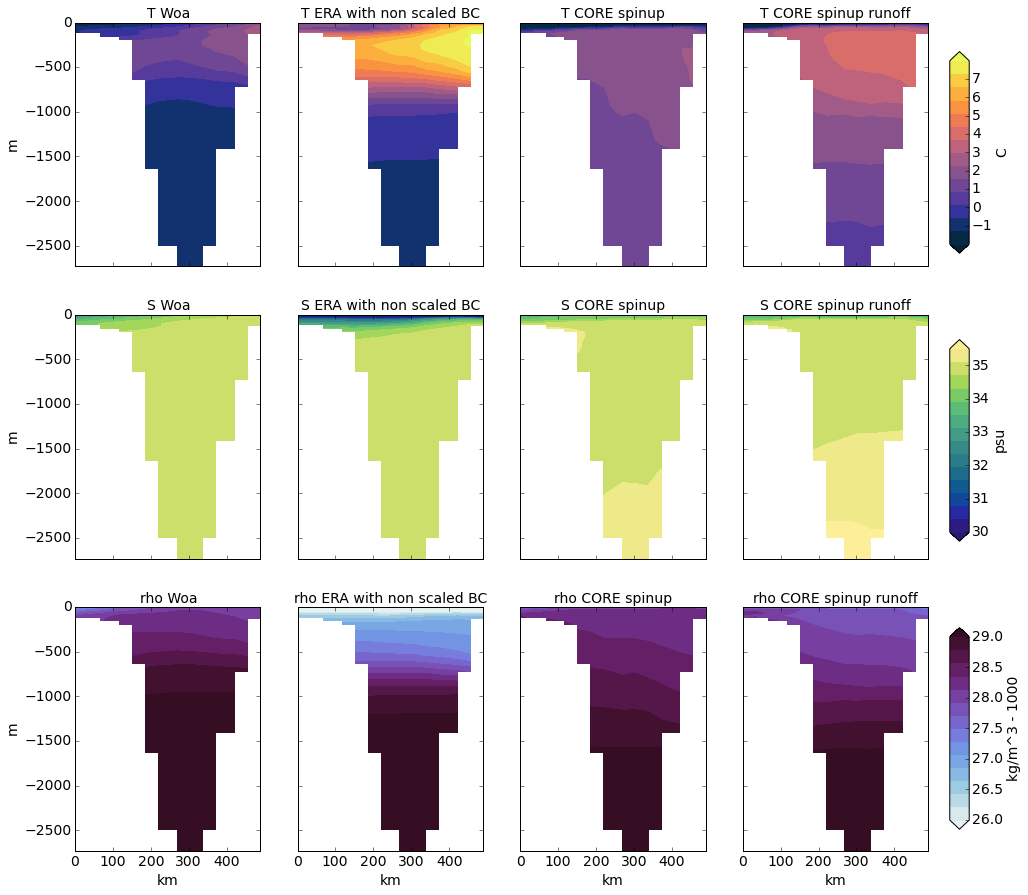

In [35]:
comp_plot(comp_pm,fram)

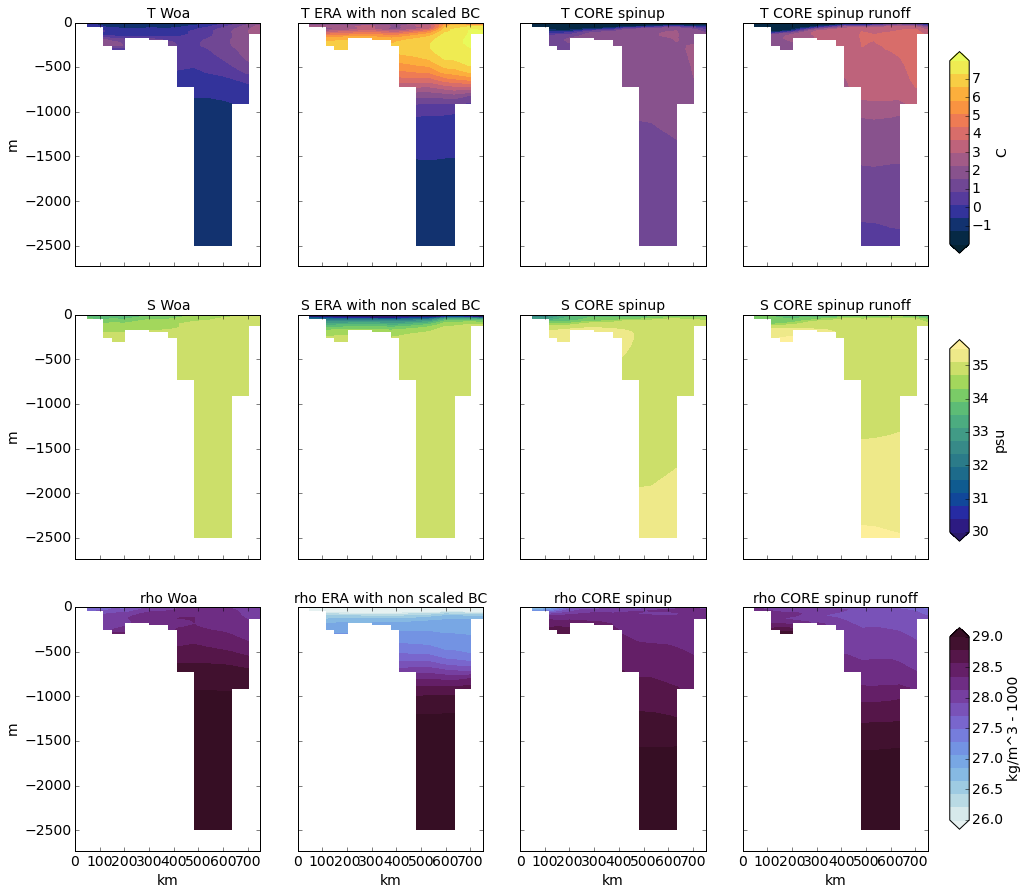

In [36]:
comp_plot(comp_pm,barents)

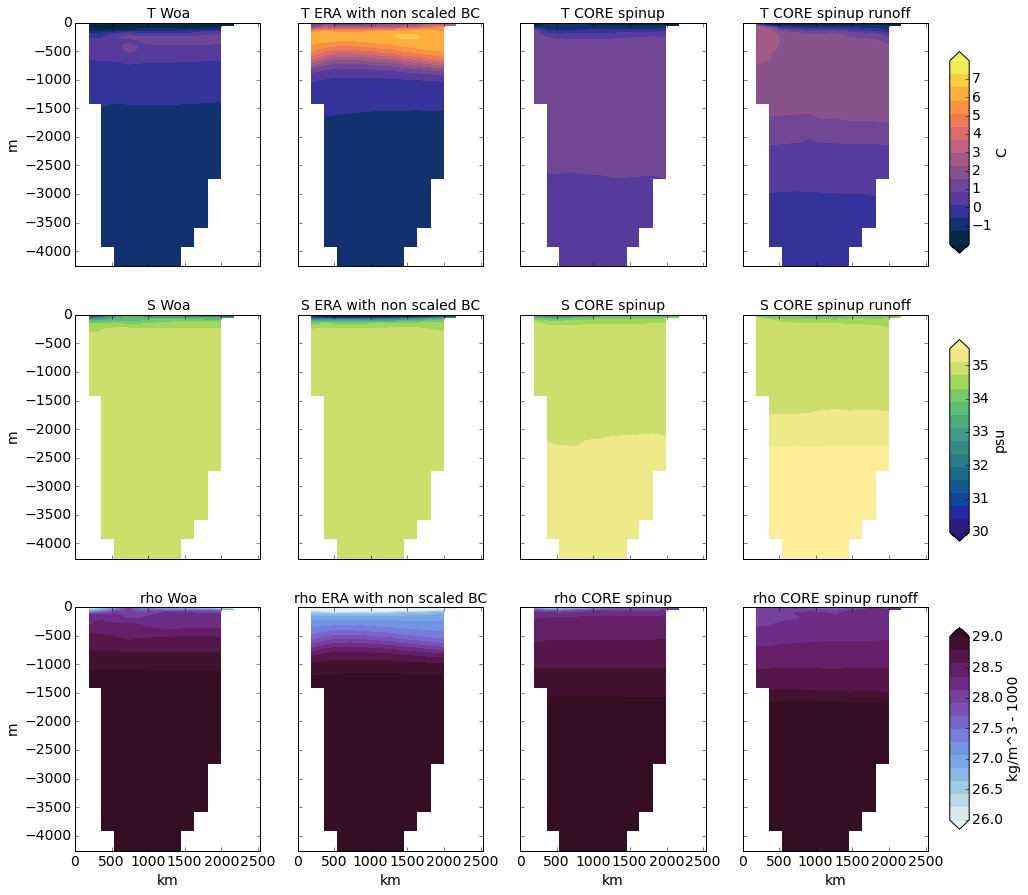

In [37]:
comp_plot(comp_pm,arctic1)

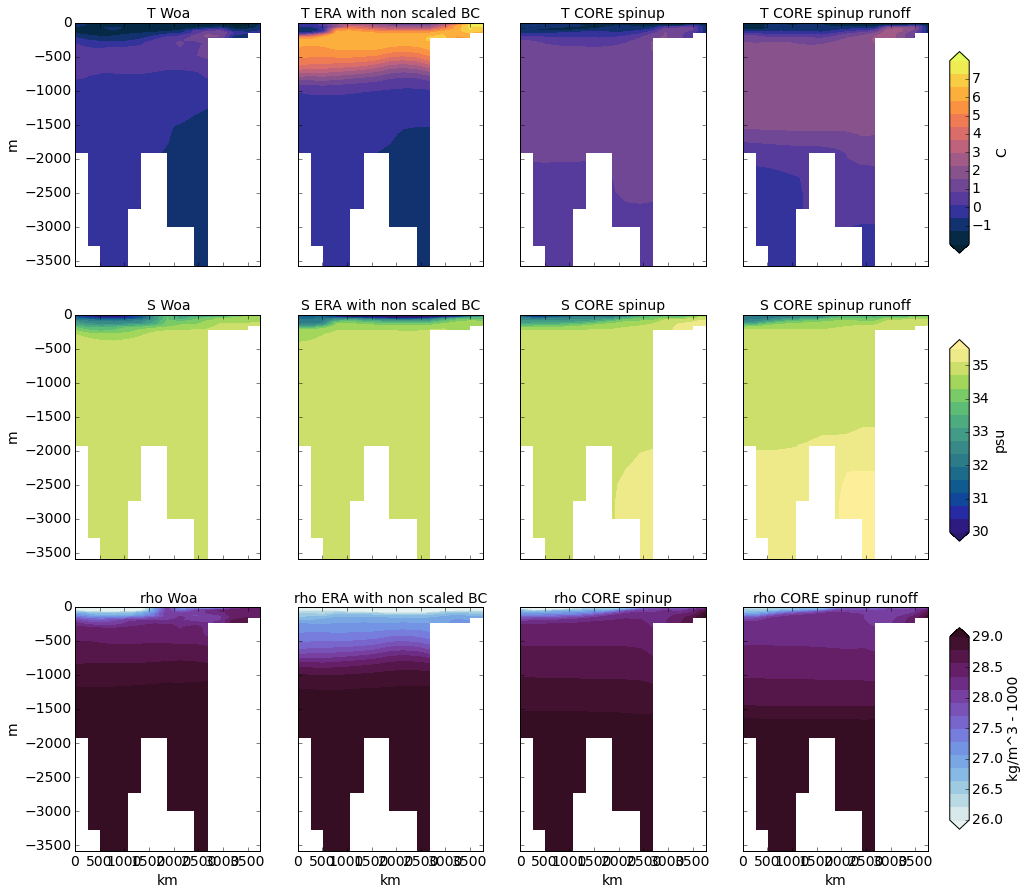

In [38]:
comp_plot(comp_pm,arctic2)

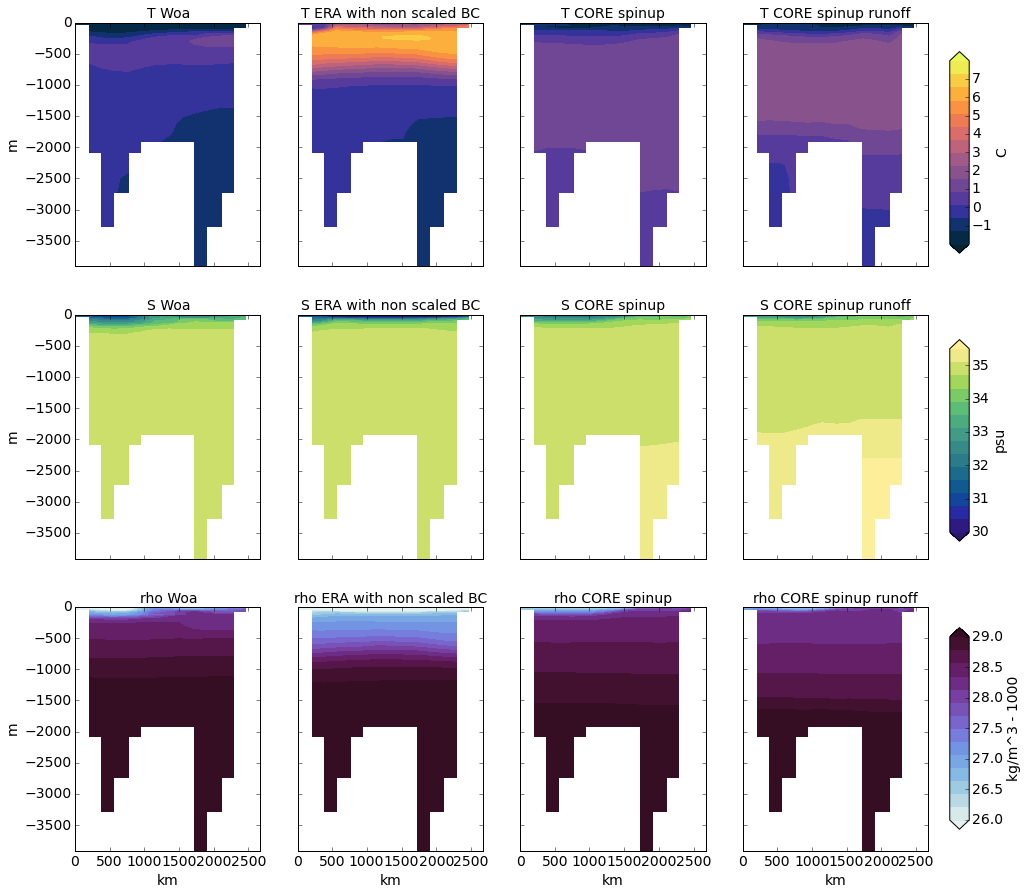

In [39]:
comp_plot(comp_pm,arctic3)

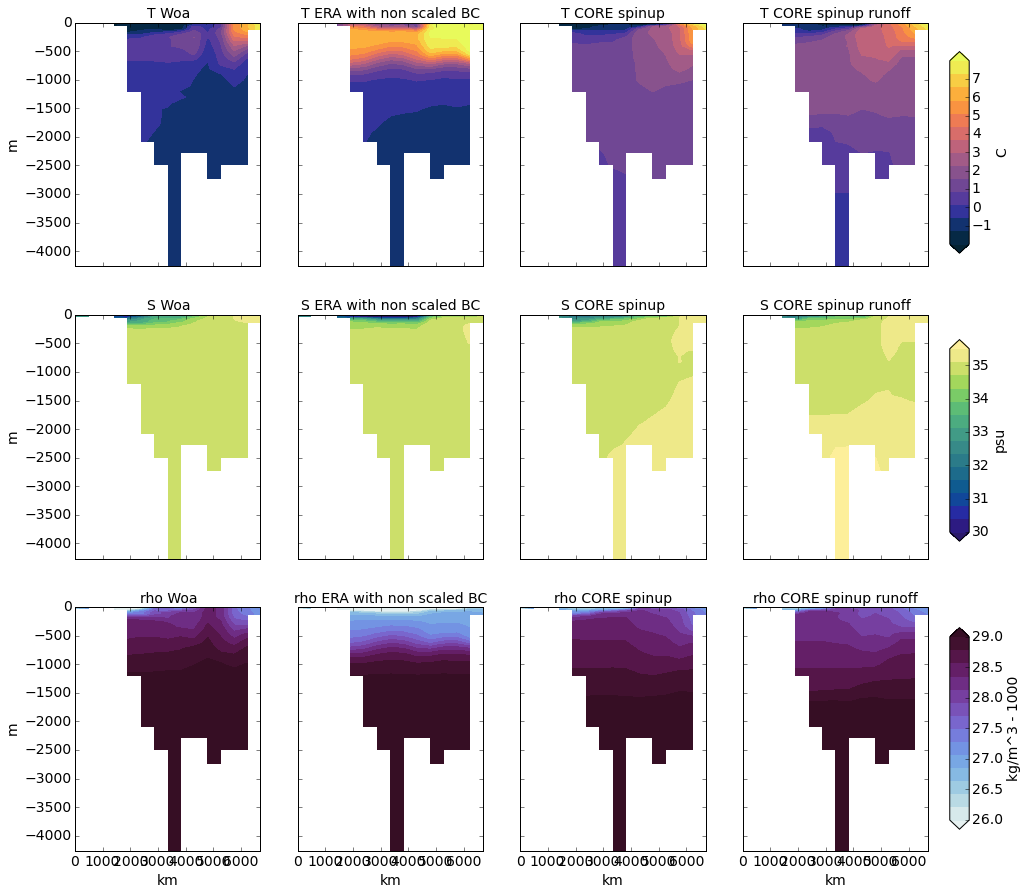

In [40]:
comp_plot(comp_pm,arctic4)

In [47]:
def plot_psi_arrow_tot(comp_data1,row=3,col=3):
    fig,axes = plt.subplots(row,col)
    vimin = -20
    vimax = 20
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp_data1[ind].title)
        masked_array = np.ma.array(comp_data1[ind].psi_ave[:,:], mask=np.isnan(comp_data1[ind].psi_ave[:,:]))
        cmap= matplotlib.cm.seismic
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        if comp_data1[ind].res == 36:
            kk = 1
        elif comp_data1[ind].res == 18:
            kk = 2
        elif comp_data1[ind].res == 9:
            kk = 4
            
        for x in range(len(comp_data1[ind].X)-1,1,-5*kk):
            for y in range(len(comp_data1[ind].Y)-1,1,-5*kk):
                ax.arrow(comp_data1[ind].X[x],comp_data1[ind].Y[y],comp_data1[ind].Uda[y,x]*80,comp_data1[ind].Vda[y,x]*80)
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=1.8)

In [56]:
def plot_psi_arrow(data):
    fig,axes = plt.subplots(1,1)
    vimin = -20
    vimax = 20
    masked_array = np.ma.array(data.psi_ave[:,:], mask=np.isnan(data.psi_ave[:,:]))
    cmap= matplotlib.cm.seismic
    cmap.set_bad('grey',1.)
    if data.res == 36:
        kk = 1
    elif data.res == 18:
        kk = 2
    elif data.res == 9:
        kk =4
    ca = imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="left")
    for x in range(len(data.X)-1,1,-3*kk):
        for y in range(len(data.Y)-1,1,-3*kk):
            plt.arrow(data.X[x],data.Y[y],data.Uda[y,x]*60,data.Vda[y,x]*60)
    cbar = fig.colorbar(ca)
    plt.title(data.title)
    fig.subplots_adjust(right=2.4,top=2.)

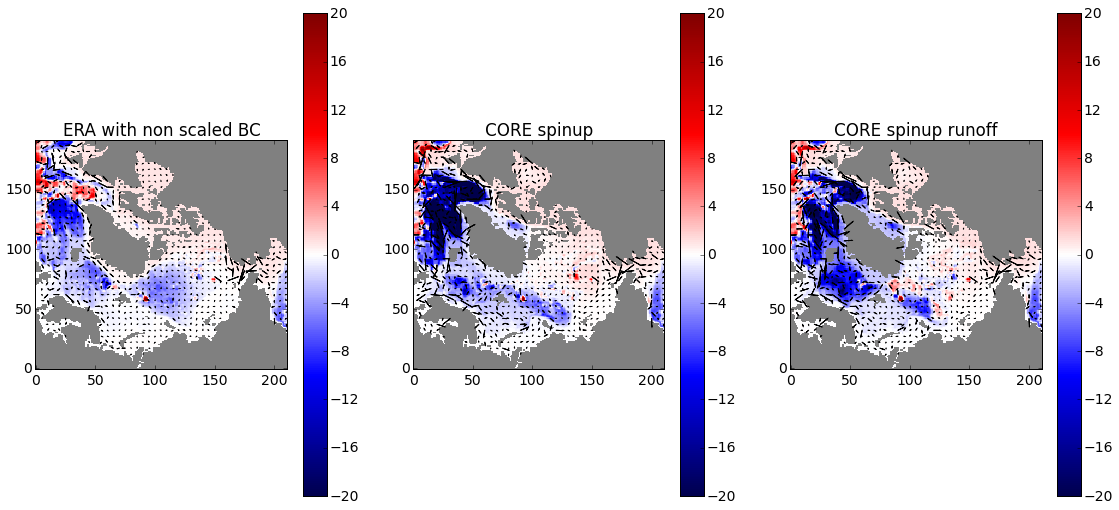

In [54]:
comp_spinup ={0 : nonscaled_obcs , 1 : CORE_spinup_first ,  2 : CORE_spinup_runoff }
plot_psi_arrow_tot(comp_spinup,row=1,col=3)

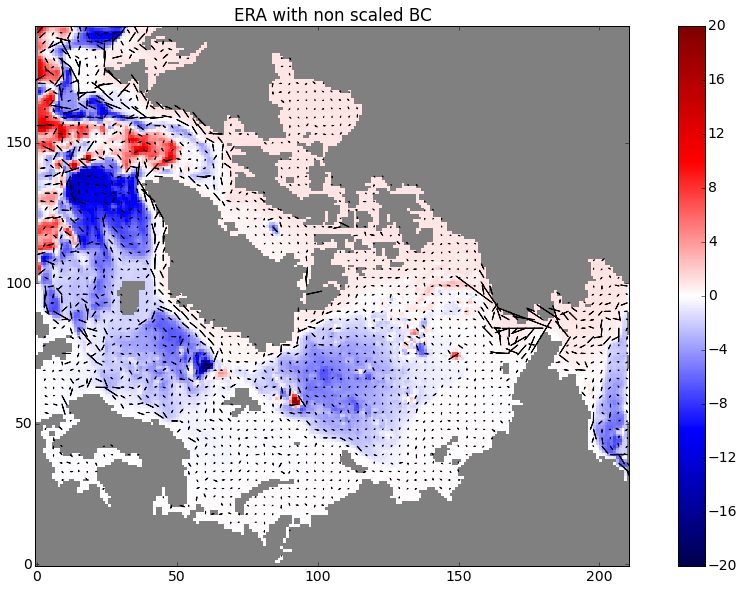

In [57]:
plot_psi_arrow(nonscaled_obcs)

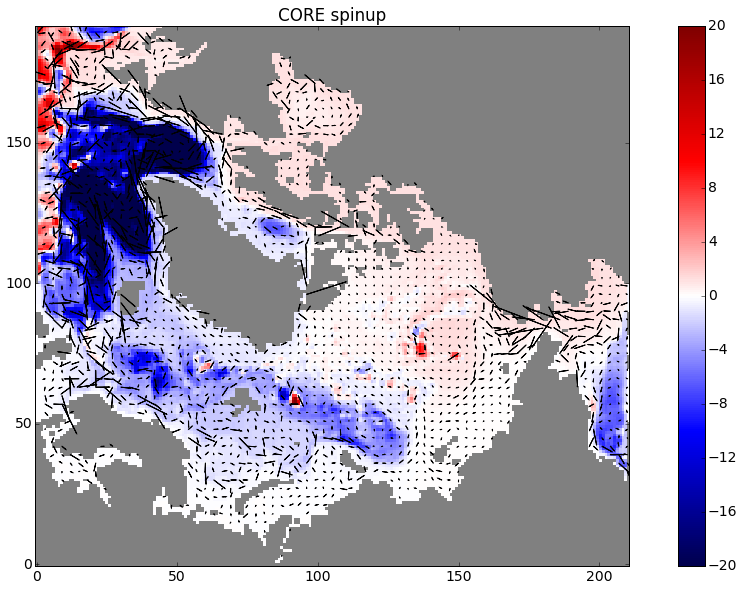

In [58]:
plot_psi_arrow(CORE_spinup_first)

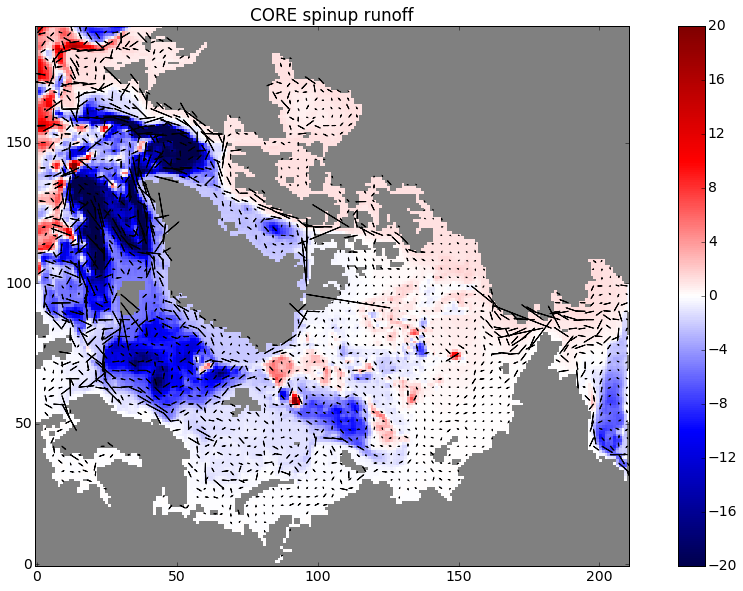

In [59]:
plot_psi_arrow(CORE_spinup_runoff)

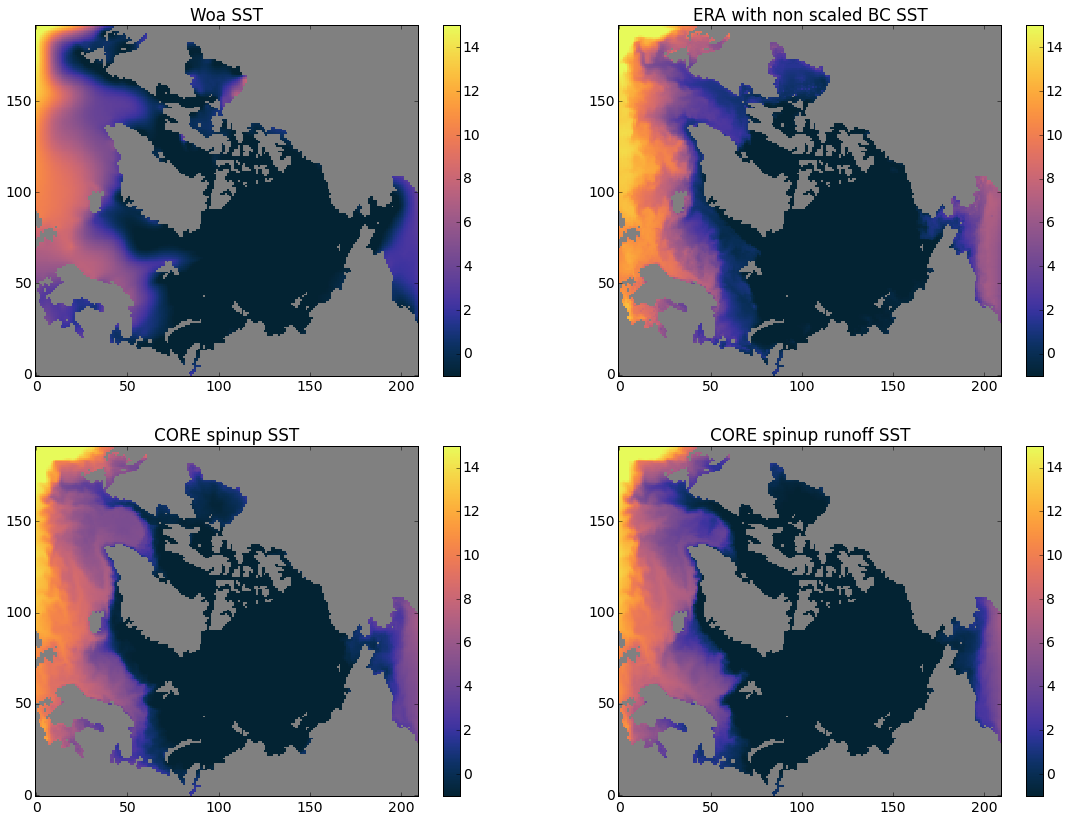

In [64]:
def plot_tot(comp,row=2,col=2):
    fig,axes = plt.subplots(row,col)
    vimin = -1
    vimax = 15
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title+' SST')
        masked_array = np.ma.array(comp[ind].T[0,:,:], mask=np.isnan(comp[ind].T[0,:,:]))
        cmap= cmocean.cm.temperature
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.8)
plot_tot(comp_pm)

Temperatures in the experiments at 200 m

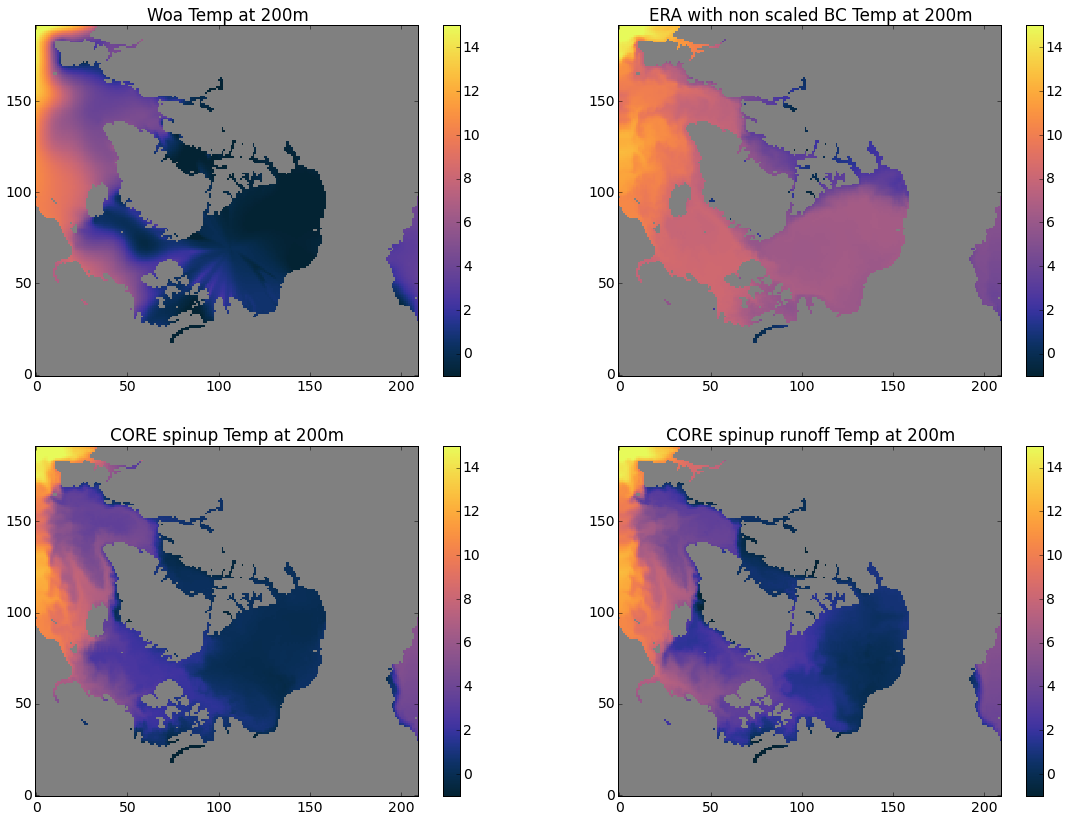

In [65]:
def plot_tot(comp,row=2,col=2):
    fig,axes = plt.subplots(row,col)
    vimin = -1
    vimax = 15
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title+' Temp at 200m ')
        masked_array = np.ma.array(comp[ind].T[16,:,:], mask=np.isnan(comp[ind].T[16,:,:]))
        cmap= cmocean.cm.temperature
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.8)
plot_tot(comp_pm)

Salinity in the experimets at surface

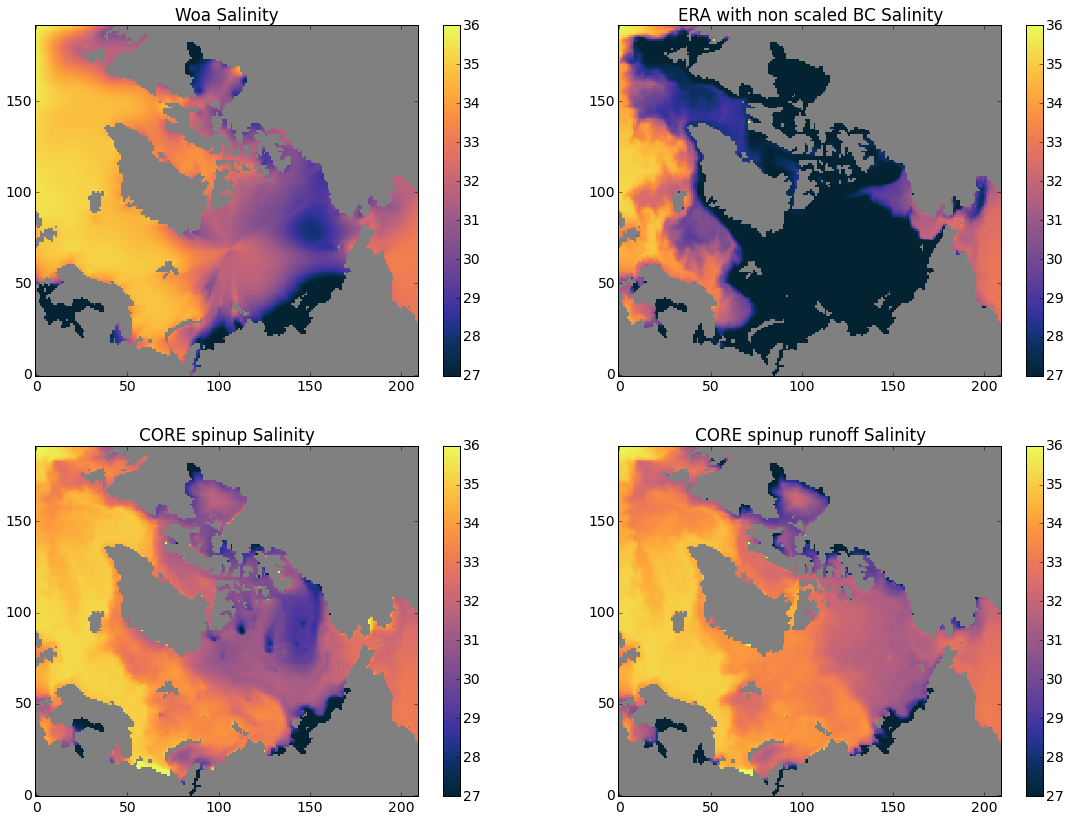

In [66]:
def plot_tot(comp,row=2,col=2):
    fig,axes = plt.subplots(row,col)
    vimin = 27
    vimax = 36
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title+' Salinity')
        masked_array = np.ma.array(comp[ind].S[0,:,:], mask=np.isnan(comp[ind].S[0,:,:]))
        cmap= cmocean.cm.temperature
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.8)
plot_tot(comp_pm)

Seaice of experiments

In [67]:
def plot_tot(comp):
    fig,axes = plt.subplots(1,3)
    vimin = 0
    vimax = 1
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(np.nanmean(comp[ind].seaice['SIarea'][:,0,:,:],axis=0), mask=np.isnan(comp[ind].seaice['SIarea'][0,0,:,:]))
        cmap= matplotlib.cm.jet
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.5,top=1.)
comp= { 0 : CORE_spinup_tocompare , 1 : CORE_18_spinup , 2 : CORE_spinup_runoff }
plot_tot(comp)

NameError: name 'CORE_18_spinup' is not defined

In [ ]:
def plot_tot(comp):
    fig,axes = plt.subplots(1,3)
    vimin = 0
    vimax = 800
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(np.nanmean(comp[ind].mxldepth[:,0,:,:],axis=0), mask = np.isnan(np.nanmean(comp[ind].mxldepth[:,0,:,:],axis=0)))
        cmap= matplotlib.cm.jet
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.5,top=1.)
plot_tot(comp)

The density ρ of each box is given by ρ = ρ0 [1 − α(T −T0) + β (S −S0)]
(13)
where ρ0 = 1027.5 kgm−3 is a reference density, T0 = 5oC is a reference temperature, α = 0.0002 oC−1 and β = 0.0008 psu−1.
The

In [68]:
mon = comp_spinup
mon = {0 : nonscaled_obcs, 1 : CORE_spinup_first , 2 : CORE_spinup_runoff}

In [69]:
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

def plot_dynSt(monitor_list,var_list,reg,row=2,col=3):
    # this function is meant to plot monitor variables   
    
    titles = {'theta_mean' : 'Temperature Mean', 'theta_min' : 'Temperature Min',\
              'theta_max' :  'Temperature Max', 'eta_mean' : 'ETA mean', 'eta_max' : 'ETA max',\
              'eta_min' : 'ETA min', 'salt_mean' : 'Salinity Mean' , 'salt_max' : 'Salinity Max',\
              'salt_min' : 'Salinity Min' , 'sss_mean': 'SSS mean' ,'sss_max' : 'SSS max',\
              'sss_min' : 'SSS min', 'sst_mean' : 'SST mean', 'sst_max' : 'SST max' ,'sst_min' : 'SST min',\
              'vvel_mean' : 'V mean', 'vvel_max' : 'V max' , 'vvel_min' : 'V min', 'uvel_mean' : 'U mean',\
              'uvel_max' : 'U max', 'uvel_min' : 'U min', 'ke_mean' : 'Kinetic mean', 'ke_max' : 'Kinetic max',\
              'ke_vol' : 'Kinetic volume', 'seaice_area_max' : 'Seaice area max',\
              'seaice_area_min' : 'Seaice area min', 'seaice_area_mean' : 'Seaice area mean', \
              'seaice_heff_max' : 'Seaice thickness max', 'seaice_heff_min' : 'Seaicea thickness max', \
              'seaice_heff_mean' : 'Seaice thickness mean', 'time_seconds' : 'Time seconds' , \
                'time_years' : 'Time years'}
    unity = {'theta_mean' : 'C', 'theta_min' : 'C', 'theta_max' :  'C', \
                 'eta_mean' : 'm', 'eta_max' : 'm', 'eta_min' : 'm', 'salt_mean' : 'psu' , \
                 'salt_max' : 'psu' , 'salt_min' : 'psu' , 'sss_mean': 'psu' , \
                 'sss_max' : 'psu', 'sss_min' : 'psu', 'sst_mean' : 'C', 'sst_max' : 'C' , \
                 'sst_min' : 'C', 'vvel_mean' : 'm/s', 'vvel_max' : 'm/s' , 'vvel_min' : 'm/s', \
                 'uvel_mean' : 'm/s', 'uvel_max' : 'm/s', 'uvel_min' : 'm/s', 'ke_mean' : 'm^2/s^2', \
                 'ke_max' : 'm^2/s^2', 'ke_vol' : 'm^2/s^2', 'seaice_area_max' : '%', \
                 'seaice_area_min' : '%', 'seaice_area_mean' : '%', \
                 'seaice_heff_max' : 'm', 'seaice_heff_min' : 'm', \
                 'seaice_heff_mean' : 'm', 'time_seconds' : 's' , \
                 'time_years' : 'Years'}
    region = { 0 : 'Global' , 1 : 'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atl' }
    
    fig, axes = plt.subplots(row,col)
    ax_ind = 0
    for var in var_list:
        for mon in monitor_list:
            if reg == 'all':
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,0,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,1,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,2,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,3,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                                       runningMeanFast(monitor_list[mon].dataDyn[var][1:,0,0],12*3)[0:-12*3],monitor_list[mon].color)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                                       runningMeanFast(monitor_list[mon].dataDyn[var][1:,1,0],12*3)[0:-12*3],monitor_list[mon].color)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                                       runningMeanFast(monitor_list[mon].dataDyn[var][1:,2,0],12*3)[0:-12*3],monitor_list[mon].color)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                                       runningMeanFast(monitor_list[mon].dataDyn[var][1:,3,0],12*3)[0:-12*3],monitor_list[mon].color)
                axes.flat[ax_ind].set_title(titles[var])
            else:
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,reg,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                                       runningMeanFast(monitor_list[mon].dataDyn[var][1:,reg,0],12*3)[0:-12*3],monitor_list[mon].color)
                axes.flat[ax_ind].set_title(titles[var]+' '+region[reg])
            if ax_ind == 0:
                print monitor_list[mon].title, monitor_list[mon].color
            axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind += 1

    fig.subplots_adjust(right=2.4,top=2.4)

In [70]:
def plot_dynSt(monitor_list,var_list,reg,row=2,col=3):
    # this function is meant to plot monitor variables   
    
    titles = {'theta_mean' : 'Temperature Mean', 'theta_min' : 'Temperature Min',\
              'theta_max' :  'Temperature Max', 'eta_mean' : 'ETA mean', 'eta_max' : 'ETA max',\
              'eta_min' : 'ETA min', 'salt_mean' : 'Salinity Mean' , 'salt_max' : 'Salinity Max',\
              'salt_min' : 'Salinity Min' , 'sss_mean': 'SSS mean' ,'sss_max' : 'SSS max',\
              'sss_min' : 'SSS min', 'sst_mean' : 'SST mean', 'sst_max' : 'SST max' ,'sst_min' : 'SST min',\
              'vvel_mean' : 'V mean', 'vvel_max' : 'V max' , 'vvel_min' : 'V min', 'uvel_mean' : 'U mean',\
              'uvel_max' : 'U max', 'uvel_min' : 'U min', 'ke_mean' : 'Kinetic mean', 'ke_max' : 'Kinetic max',\
              'ke_vol' : 'Kinetic volume', 'seaice_area_max' : 'Seaice area max',\
              'seaice_area_min' : 'Seaice area min', 'seaice_area_mean' : 'Seaice area mean', \
              'seaice_heff_max' : 'Seaice thickness max', 'seaice_heff_min' : 'Seaicea thickness max', \
              'seaice_heff_mean' : 'Seaice thickness mean', 'time_seconds' : 'Time seconds' , \
                'time_years' : 'Time years'}
    unity = {'theta_mean' : 'C', 'theta_min' : 'C', 'theta_max' :  'C', \
                 'eta_mean' : 'm', 'eta_max' : 'm', 'eta_min' : 'm', 'salt_mean' : 'psu' , \
                 'salt_max' : 'psu' , 'salt_min' : 'psu' , 'sss_mean': 'psu' , \
                 'sss_max' : 'psu', 'sss_min' : 'psu', 'sst_mean' : 'C', 'sst_max' : 'C' , \
                 'sst_min' : 'C', 'vvel_mean' : 'm/s', 'vvel_max' : 'm/s' , 'vvel_min' : 'm/s', \
                 'uvel_mean' : 'm/s', 'uvel_max' : 'm/s', 'uvel_min' : 'm/s', 'ke_mean' : 'm^2/s^2', \
                 'ke_max' : 'm^2/s^2', 'ke_vol' : 'm^2/s^2', 'seaice_area_max' : '%', \
                 'seaice_area_min' : '%', 'seaice_area_mean' : '%', \
                 'seaice_heff_max' : 'm', 'seaice_heff_min' : 'm', \
                 'seaice_heff_mean' : 'm', 'time_seconds' : 's' , \
                 'time_years' : 'Years'}
    region = { 0 : 'Global' , 1 : 'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atl' }
    
    fig, axes = plt.subplots(row,col)
    ax_ind = 0
    for var in var_list:
        for mon in monitor_list:
            if reg == 'all':
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,0,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,1,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,2,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,3,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                        runningMeanFast(monitor_list[mon].dataDyn[var][1:,0,0],12*3)[0:-12*3],monitor_list[mon].color)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                        runningMeanFast(monitor_list[mon].dataDyn[var][1:,1,0],12*3)[0:-12*3],monitor_list[mon].color)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                        runningMeanFast(monitor_list[mon].dataDyn[var][1:,2,0],12*3)[0:-12*3],monitor_list[mon].color)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                        runningMeanFast(monitor_list[mon].dataDyn[var][1:,3,0],12*3)[0:-12*3],monitor_list[mon].color,\
                                       label=monitor_list[mon].title)
                axes.flat[ax_ind].set_title(titles[var])
            else:
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,reg,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                                       runningMeanFast(monitor_list[mon].dataDyn[var][1:,reg,0],12*3)[0:-12*3]\
                                       ,monitor_list[mon].color,label=monitor_list[mon].title)
                axes.flat[ax_ind].set_title(titles[var]+' '+region[reg])

            plt.legend(bbox_to_anchor=(-2.5, 1.02, 2., 1.5),
                   ncol=4, mode="expand", borderaxespad=0.)
            axes.flat[ax_ind].set_ylabel(unity[var])
            monitor_list[mon]
        ax_ind += 1

    fig.subplots_adjust(right=2.4,top=2.4)

In [71]:
def plot_psi(monitor_list,vimin,vimax,cmap,row=1,col=3):
    fig, axes = plt.subplots(nrows=row, ncols=col)
    for mon_v in monitor_list:        #print mon
        axes.flat[0].plot(monitor_list[mon_v].barostream['years'],monitor_list[mon_v].barostream['psi_mean'],\
                          monitor_list[mon_v].color,alpha=0.2)
        axes.flat[0].plot(monitor_list[mon_v].barostream['years'][0:-12],\
                          runningMeanFast(monitor_list[mon_v].barostream['psi_mean'],12)[0:-12],\
                          monitor_list[mon_v].color)
        axes.flat[0].set_xlabel('Month')
        axes.flat[0].set_ylabel('SV')
        axes.flat[0].set_title('Average barotropic streamfunction')
        
        axes.flat[1].plot(monitor_list[mon_v].barostream['years'],monitor_list[mon_v].barostream['psi_min'],\
                          monitor_list[mon_v].color,alpha=0.2)
        axes.flat[1].plot(monitor_list[mon_v].barostream['years'][0:-12],\
                          runningMeanFast(monitor_list[mon_v].barostream['psi_min'],12)[0:-12],\
                          monitor_list[mon_v].color)
        axes.flat[1].set_xlabel('Month')
        axes.flat[1].set_ylabel('SV')
        axes.flat[1].set_title('Minimum barotropic streamfunction')
        
        axes.flat[2].plot(monitor_list[mon_v].barostream['years'],monitor_list[mon_v].barostream['psi_max'],\
                          monitor_list[mon_v].color,alpha=0.2)
        axes.flat[2].plot(monitor_list[mon_v].barostream['years'][0:-12],\
                          runningMeanFast(monitor_list[mon_v].barostream['psi_max'],12)[0:-12],\
                          monitor_list[mon_v].color)
        axes.flat[2].set_xlabel('Month')
        axes.flat[2].set_ylabel('SV')
        axes.flat[2].set_title('Maximum barotropic streamfunction')
        
        plt.legend(bbox_to_anchor=(-2.5, 1.02, 2., .3),
           ncol=4, mode="expand", borderaxespad=0.)
        
    fig.subplots_adjust(right=2.5,top=1.2)


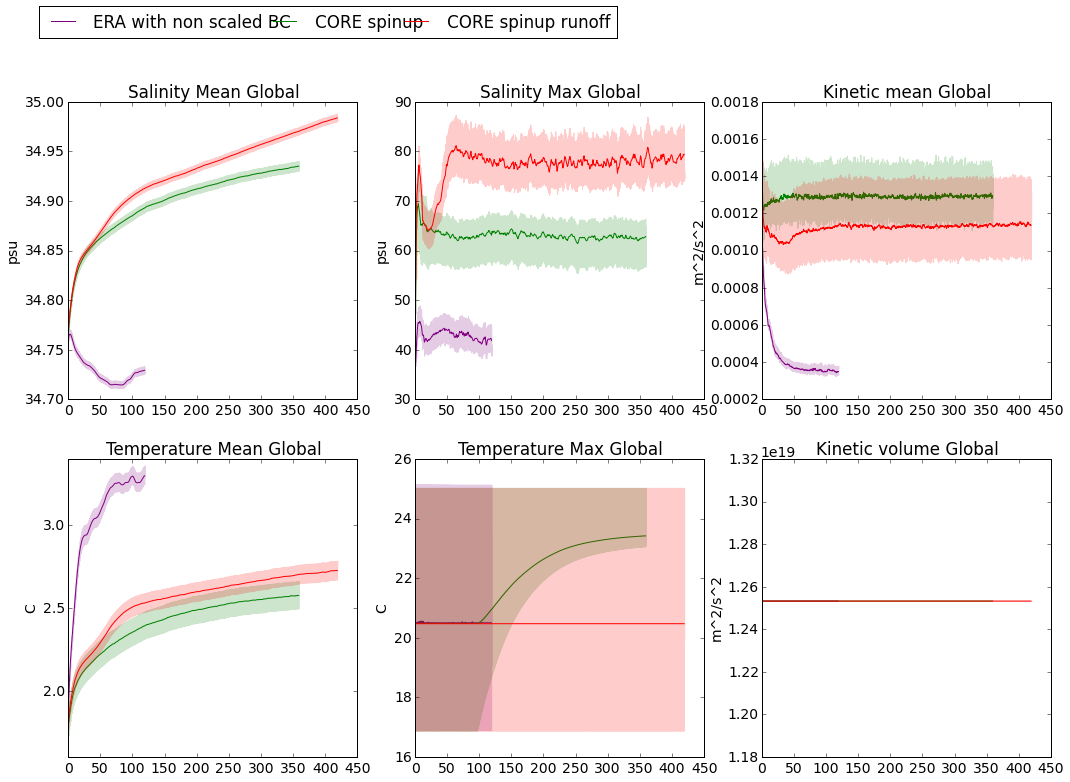

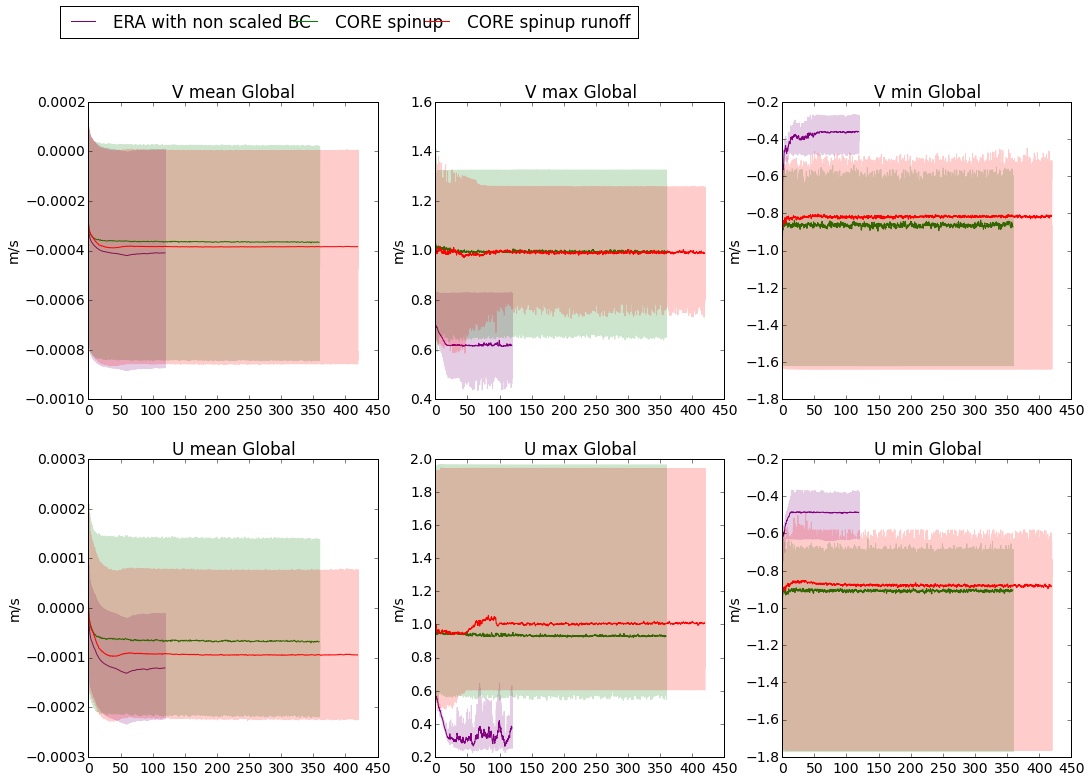

In [73]:
plot_dynSt(mon,['salt_mean','salt_max','ke_mean','theta_mean','theta_max','ke_vol'],0)
plot_dynSt(mon,['vvel_mean','vvel_max','vvel_min','uvel_mean','uvel_max','uvel_min'],0)

0 purple
1 green
2 red


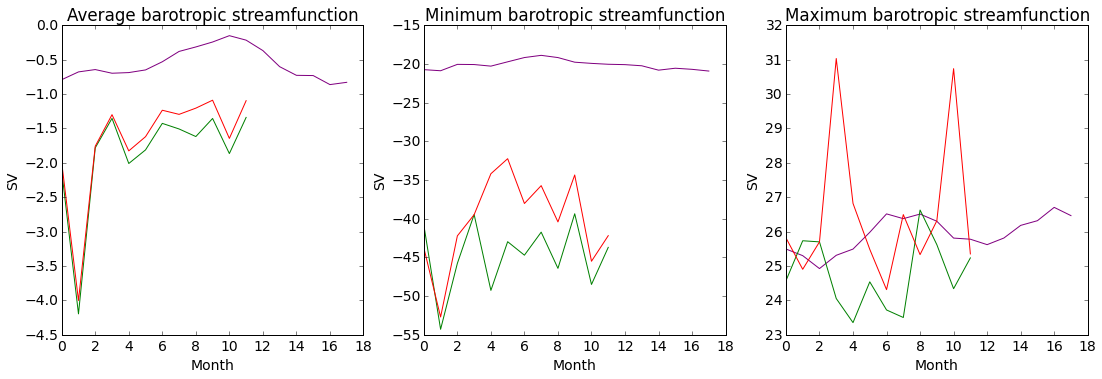

In [77]:
def plot_lv(mon,var,vimin,vimax,cmap,row=1,col=3):
    fig, axes = plt.subplots(nrows=row, ncols=col)
    for mon_v in mon:        #print mon
        axes.flat[0].plot(mon[mon_v].psi_mean,mon[mon_v].color)
        axes.flat[0].set_xlabel('Month')
        axes.flat[0].set_ylabel('SV')
        axes.flat[0].set_title('Average barotropic streamfunction')
        
        axes.flat[1].plot(mon[mon_v].psi_min,mon[mon_v].color)
        axes.flat[1].set_xlabel('Month')
        axes.flat[1].set_ylabel('SV')
        axes.flat[1].set_title('Minimum barotropic streamfunction')
        
        axes.flat[2].plot(mon[mon_v].psi_max,mon[mon_v].color)
        axes.flat[2].set_xlabel('Month')
        axes.flat[2].set_ylabel('SV')
        axes.flat[2].set_title('Maximum barotropic streamfunction')
        print mon_v,mon[mon_v].color
    fig.subplots_adjust(right=2.5,top=1.2)
plot_lv(mon,'theta_lv_mean',-1,7,matplotlib.cm.jet)

In [78]:
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

In [79]:
def plot_psi(monitor_list,vimin,vimax,cmap,row=1,col=3):
    fig, axes = plt.subplots(nrows=row, ncols=col)
    for mon_v in monitor_list:        #print mon                                                                                       
        axes.flat[0].plot(monitor_list[mon_v].barostream['years'],monitor_list[mon_v].barostream['psi_mean'],\
                          monitor_list[mon_v].color,alpha=0.2)
        axes.flat[0].plot(monitor_list[mon_v].barostream['years'][0:-12],\
                          runningMeanFast(monitor_list[mon_v].barostream['psi_mean'],12)[0:-12],\
                          monitor_list[mon_v].color)
        axes.flat[0].set_xlabel('Month')
        axes.flat[0].set_ylabel('SV')
        axes.flat[0].set_title('Average barotropic streamfunction')

        axes.flat[1].plot(monitor_list[mon_v].barostream['years'],monitor_list[mon_v].barostream['psi_min'],\
                          monitor_list[mon_v].color,alpha=0.2)
        axes.flat[1].plot(monitor_list[mon_v].barostream['years'][0:-12],\
                          runningMeanFast(monitor_list[mon_v].barostream['psi_min'],12)[0:-12],\
                          monitor_list[mon_v].color)
        axes.flat[1].set_xlabel('Month')
        axes.flat[1].set_ylabel('SV')
        axes.flat[1].set_title('Minimum barotropic streamfunction')

        axes.flat[2].plot(monitor_list[mon_v].barostream['years'],monitor_list[mon_v].barostream['psi_max'],\
                          monitor_list[mon_v].color,alpha=0.2)
        axes.flat[2].plot(monitor_list[mon_v].barostream['years'][0:-12],\
                          runningMeanFast(monitor_list[mon_v].barostream['psi_max'],12)[0:-12],\
                          monitor_list[mon_v].color ,label = monitor_list[mon_v].title)
        axes.flat[2].set_xlabel('Month')
        axes.flat[2].set_ylabel('SV')
        axes.flat[2].set_title('Maximum barotropic streamfunction')

        plt.legend(bbox_to_anchor=(-2.5, 1.02, 2., .3),
           ncol=4, mode="expand", borderaxespad=0.)

    fig.subplots_adjust(right=2.5,top=1.2)

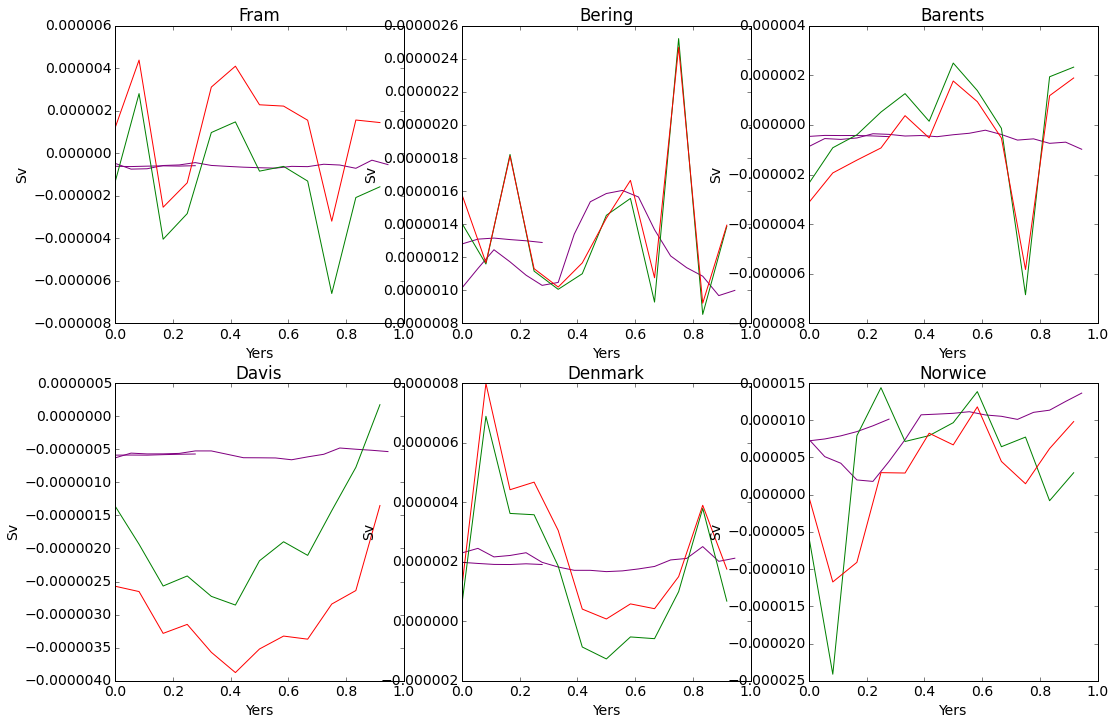

In [80]:
def plot_flux(monitor_list,var_list,flux,row=2,col=3,alpha=0.2):
    # this function is meant to plot monitor variables   
    fig, axes = plt.subplots(row,col)
    ax_ind = 0
    for var in var_list:
        for mon in monitor_list:
            axes.flat[ax_ind].plot(monitor_list[mon].years,monitor_list[mon].fluxes[var][flux]/10**6,monitor_list[mon].color,alpha=alpha)
            axes.flat[ax_ind].plot(monitor_list[mon].years[0:-12],runningMeanFast(monitor_list[mon].fluxes[var][flux]/10**6,12)[0:-12],monitor_list[mon].color)
            axes.flat[ax_ind].set_title(var)
            axes.flat[ax_ind].set_ylabel('Sv')
            axes.flat[ax_ind].set_xlabel('Yers')
        ax_ind += 1

    fig.subplots_adjust(right=2.4,top=2.4)
#varlist = {'Fram' : 'Fram' , 'Bering' : 'Bering' , 'Barents':'Barents','Davis':'Davis','Denmark':'Denmark','Norwice':'Norwice'}
varlist = ['Fram' , 'Bering' , 'Barents','Davis','Denmark','Norwice']
plot_flux(comp_spinup,varlist,'FluxSum',alpha=1)

In [81]:
def plot_lv(monitor_list,var,reg,vimin,vimax,cmap,row=4):
    unit_titles = { 'theta_lv_mean' : 'T' , 'theta_lv_min' : 'T' , 'theta_lv_max' : 'T' , 
                'salt_lv_mean' : 'S' , 'salt_lv_min' : 'S' , 'salt_lv_max' : 'S' ,
                'rho_lv_mean' : 'Rho' , 'rho_lv_min' : 'Rho' , 'rho_lv_max' : 'Rho' , 
                'uvel_lv_mean' : 'U' ,'uvel_lv_min' : 'U' ,'uvel_lv_max' : 'U' , 
                'vvel_lv_mean' : 'V' ,'vvel_lv_min' : 'V' ,'vvel_lv_max' : 'V' , 
                 'ke_lv_mean' : 'KE' ,}
    reg_title = { 0 : 'Global' , 1 : 'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atl'}
    
    levels = { 'theta_lv_mean' : [-1,0,1,2,3,5,7] ,\
              'theta_lv_min' :  [-1,0,1,2,3,5,7], \
              'theta_lv_max' : [-1,0,1,2,3,5,7] , \
              'salt_lv_mean' : [33,34,35,37,40,45,50,60,70] ,\
              'salt_lv_min' : [33,34,35,37,40,45,50,60,70],\
              'salt_lv_max' : [33,34,35,37,40,45,50,60,70],\
              'rho_lv_mean' : [1026,1028,1030,1032,1034,1036,1038],\
              'rho_lv_min' : [1026,1028,1030,1032,1034,1036,1038],\
              'rho_lv_max' : [1026,1028,1030,1032,1034,1036,1038],\
              'ke_lv_mean' : [0, 0.01, 0.02, 0.03,0.04, 0.05,],\
              'uvel_lv_mean' : [-0.01, 0, 0.01, 0.01],\
              'uvel_lv_min' : [-0.01, 0, 0.01, 0.01],\
              'uvel_lv_max' : [-0.01, 0, 0.01, 0.01],\
              'vvel_lv_mean' : [-0.01, 0, 0.01, 0.01],\
              'vvel_lv_min' : [-0.01, 0, 0.01, 0.01],\
              'vvel_lv_max' : [-0.01, 0, 0.01, 0.01]
             }
    
    col = len(monitor_list)
    
    
    fig, axes = plt.subplots(nrows=row, ncols=col, sharex=True, sharey=True)
    ax_ind = 0
    ticks = np.linspace(vimin,vimax,5)
    for mon in monitor_list:
        reg = 0
        regz = 0
        ca = axes.flat[ax_ind].pcolor(monitor_list[mon].dataDyn['time_lv_years'],monitor_list[mon].Z,\
                    monitor_list[mon].dataDyn[var][:monitor_list[mon].dataDyn['time_lv_years'].shape[0],reg,:].T,\
                    vmin = vimin, vmax = vimax, cmap = cmap,)        
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind], ticks=ticks )
        axes.flat[ax_ind].set_title(unit_titles[var]+' '+reg_title[reg]+' '+monitor_list[mon].title)
        
        reg = 1
        regz = 46
        ca = axes.flat[ax_ind + col].pcolor(monitor_list[mon].dataDyn['time_lv_years'],monitor_list[mon].Z[0:regz],\
                    monitor_list[mon].dataDyn[var][:monitor_list[mon].dataDyn['time_lv_years'].shape[0],reg,0:regz].T,\
                    vmin = vimin, vmax = vimax, cmap = cmap,)
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind + col], ticks=ticks)
        axes.flat[ax_ind + col].set_title(unit_titles[var]+' '+reg_title[reg]+' '+monitor_list[mon].title)
        
        reg = 2
        regz = 45
        ca = axes.flat[ax_ind + col*2].pcolor(monitor_list[mon].dataDyn['time_lv_years'],monitor_list[mon].Z[0:regz],\
                    monitor_list[mon].dataDyn[var][:monitor_list[mon].dataDyn['time_lv_years'].shape[0],reg,0:regz].T,\
                    vmin = vimin, vmax = vimax, cmap = cmap,)
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind + col*2], ticks=ticks)
        axes.flat[ax_ind + col*2].set_title(unit_titles[var]+' '+reg_title[reg]+' '+monitor_list[mon].title)
        
        reg = 3
        regz = 50
        ca = axes.flat[ax_ind + col*3].pcolor(monitor_list[mon].dataDyn['time_lv_years'],monitor_list[mon].Z[0:regz],\
                    monitor_list[mon].dataDyn[var][:monitor_list[mon].dataDyn['time_lv_years'].shape[0],reg,0:regz].T,\
                    vmin = vimin, vmax = vimax, cmap = cmap,)
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind + col*3], ticks=ticks)
        axes.flat[ax_ind + col*3].set_title(unit_titles[var]+' '+reg_title[reg]+' '+monitor_list[mon].title)
        
        axes.flat[ax_ind + col*3].set_xlabel('Years')
        axes.flat[0].set_ylabel('m')
        axes.flat[col].set_ylabel('m')
        axes.flat[col*2].set_ylabel('m')
        axes.flat[col*3].set_ylabel('m')
        ax_ind += 1
        
    fig.subplots_adjust(right=2.4,top=2.8)

In [82]:
class Woa:
    def __init__(self):
        file2read = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
        bathy = file2read.variables['HFacC']
        self.bathy = bathy[:]*1
        Z = file2read.variables['Z']
        Z = Z[:]*1
        self.Z = Z
        lat = file2read.variables['YC']
        self.lat = lat[:]*1
        lon = file2read.variables['XC']
        self.lon = lon[:]*1
        file1 = '/hpcdata/scratch/am8e13/cs_36km_tutorial/run_input/WOA05_THETA_JAN_210x192x50_arctic'
        self.T = komod.mitbin(file1,xdim=192,ydim=210,zdim=50,datatype='float32')
        self.T = np.squeeze(self.T,axis=0)
        self.T[self.bathy == 0] = np.nan
        file1 = '/hpcdata/scratch/am8e13/cs_36km_tutorial/run_input/WOA05_SALT_JAN_210x192x50_arctic'
        self.S = komod.mitbin(file1,xdim=192,ydim=210,zdim=50,datatype='float32')
        self.S = np.squeeze(self.S,axis=0)
        self.S[self.bathy == 0] = np.nan
        self.rho = rho(self.S,self.T)
        self.rhop = rhop(self.S,self.T)
        self.depth = Z
        self.years = np.linspace(0,60,num=36*60)
        # calculate jmd 95 density                                                                                                                                                                                            
        self.rho_jmd = np.zeros_like(self.rho)
        for z in range(len(self.Z)):
            self.rho_jmd[z,:,:] = densjmd95(self.S[z,:,:],self.T[z,:,:],-9.81*self.Z[z]*1025)

        self.title = 'Woa'
        self.dataDyn = {'theta_lv_mean' : np.zeros([50,4,36*60]),
                        'salt_lv_mean' : np.zeros([50,4,36*60]),
                        'rho_lv_mean' : np.zeros([50,4,36*60]),
                        'time_lv_years' : np.linspace(0,60,num=36*60)}
        
        mask1,mask2,mask3 = region_mask(36)
        
        self.dataDyn['theta_lv_mean'][:,0,:] = np.tile(np.reshape((np.nanmean(np.nanmean(self.T,axis=1),axis=1)),(50,1)),(1,36*60))
        self.dataDyn['salt_lv_mean'][:,0,:] = np.tile(np.reshape((np.nanmean(np.nanmean(self.S,axis=1),axis=1)),(50,1)),(1,36*60))
        self.dataDyn['rho_lv_mean'][:,0,:] = rhop(self.dataDyn['salt_lv_mean'][:,0,:],self.dataDyn['theta_lv_mean'][:,0,:])
        
        self.dataDyn['theta_lv_mean'][:,1,:] = np.tile(np.reshape((np.nanmean(np.nanmean(self.T*mask1,axis=1),axis=1)),(50,1)),(1,36*60))
        self.dataDyn['salt_lv_mean'][:,1,:] = np.tile(np.reshape((np.nanmean(np.nanmean(self.S*mask1,axis=1),axis=1)),(50,1)),(1,36*60))
        self.dataDyn['rho_lv_mean'][:,1,:] = rhop(self.dataDyn['salt_lv_mean'][:,1,:],self.dataDyn['theta_lv_mean'][:,1,:])
        
        self.dataDyn['theta_lv_mean'][:,2,:] = np.tile(np.reshape((np.nanmean(np.nanmean(self.T*mask2,axis=1),axis=1)),(50,1)),(1,36*60))
        self.dataDyn['salt_lv_mean'][:,2,:] = np.tile(np.reshape((np.nanmean(np.nanmean(self.S*mask2,axis=1),axis=1)),(50,1)),(1,36*60))
        self.dataDyn['rho_lv_mean'][:,2,:] = rhop(self.dataDyn['salt_lv_mean'][:,2,:],self.dataDyn['theta_lv_mean'][:,2,:])

        self.dataDyn['theta_lv_mean'][:,3,:] = np.tile(np.reshape((np.nanmean(np.nanmean(self.T*mask3,axis=1),axis=1)),(50,1)),(1,36*60))
        self.dataDyn['salt_lv_mean'][:,3,:] = np.tile(np.reshape((np.nanmean(np.nanmean(self.S*mask3,axis=1),axis=1)),(50,1)),(1,36*60))
        self.dataDyn['rho_lv_mean'][:,3,:] = rhop(self.dataDyn['salt_lv_mean'][:,3,:],self.dataDyn['theta_lv_mean'][:,3,:])
        
        

In [83]:
woa = Woa()

In [ ]:
comp_pm = {0 : CORE_spinup_first , 1 : CORE_spinup_runoff ,  2 : nonscaled_obcs }

In [ ]:
plot_lv(comp_pm,'theta_lv_mean',3,-1,7,cmocean.cm.temperature)

In [ ]:
plot_lv(mon,'salt_lv_mean',0,32,37,cmocean.cm.salinity)

In [ ]:
plot_lv(mon,'rho_lv_mean',0,1026,1040,cmocean.cm.density)

In [ ]:
plot_lv(mon,'ke_lv_mean',0,0,0.05,cmocean.cm.chlorophyll)

In [ ]:
plot_lv(mon,'uvel_lv_mean',0,-0.01,0.01,cmocean.cm.velocity)

In [ ]:
plot_lv(mon,'vvel_lv_mean',0,-0.01,0.01,cmocean.cm.velocity)

In [ ]:
NCEP = read_forcing('/scratch/general/am8e13/NCEP_data/','cube78_',1992,16)   
ERA = read_forcing('/scratch/general/am8e13/forcing/ERA_data/','ERA40g_',1979,23)
JRA = read_forcing('/scratch/general/am8e13/forcing/JRA_data/','jra25_',1979,24)
CORE2,time_core = read_core('/scratch/general/am8e13/forcing/CORE2_data/')
titles, unity = dataset_unity()

In [ ]:
fig, axes = plt.subplots(4,2)
yp =1
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','spfh2m','rain','rain']
time = np.array(range(len(ERA['data']['v10m'])))/360.

for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        #axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'black')
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue')
        #axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data'][var][0:360*yp],'green')
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'red')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'purple')
        axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data_ave'][var][0:360*yp],'orange')
        axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4

print 'ERA in black with average in red'
print 'JRA in blue with average in yellow'
print 'NCEP in green with average in orange'
fig.subplots_adjust(right=2.1,top=2.4)

In [ ]:
fig, axes = plt.subplots(2,3)
yp =1
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','rain']
time = np.array(range(len(ERA['data']['v10m'])))/360.

for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'blue')
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue')
        #axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data'][var][0:360*yp],'green')
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'red')
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'purple')
        #axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data_ave'][var][0:360*yp],'orange')
        axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4

print 'ERA in grey with average in red'
print 'JRA in blue with average in yellow'
print 'NCEP in green with average in orange'
fig.subplots_adjust(right=2.4,top=2.1)